## Xgboost

In [ ]:
library(caret)
install.packages("e1071")
install.packages("gbm")
install.packages("xgboost")
library(gbm)
options(warn=-1)


In [ ]:
source ("cruzadas avnnet y log binaria.R")
source ("cruzada arbolbin.R")
source ("cruzada rf binaria.R")
source ("cruzada gbm binaria.R")
source ("cruzada xgboost binaria.R")

In [2]:
load("data.Rda")
head(data)

,age,yronset,sex_m,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_nk,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y,hosp_y,outcome
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0.45582598,-1.465502,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,No
2,-0.05347366,-1.465502,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,No
3,1.09245054,-1.465502,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,No
4,-1.70869752,-1.465502,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No
5,-1.45404770,-1.465502,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,Yes
6,-0.56277331,-1.465502,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,No


## Set de variables clásico

### Tuneado de Xgboost con Caret



Caret permite tunear estos parámetros básicos:
 
 
- nrounds (# Boosting Iterations)=número de iteraciones
- max_depth (Max Tree Depth)=profundida máxima de los árboles
- eta (Shrinkage)=parámetro v gradient boosting
- gamma (Minimum Loss Reduction)=gamma
- cte regularización. Dejar a 0 por defecto
- colsample_bytree (Subsample Ratio of Columns) 
- % Sorteo variables antes de cada árbol ,    
- min_child_weight (Minimum Sum of Instance Weight).
- observaciones mínimas en el nodo final. Similar al minobsinnode del gbm.
- subsample (Subsample Percentage) 
- % Sorteo de observaciones antes de cada árbol , al estilo de random forest.
- Dejar a 1 por defecto.


In [7]:
set.seed(40)

xgbmgrid<-expand.grid(
 min_child_weight=c(5,10,20),
 eta=c(0.1,0.05,0.03,0.01,0.001),
 nrounds=c(100,500,1000,5000),
 max_depth=6,gamma=0,colsample_bytree=1,subsample=1)

control<-trainControl(method = "cv",number=4,savePredictions = "all",classProbs=TRUE) 

xgbm_1<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,,data=data,
            method="xgbTree",
            trControl=control,
            tuneGrid=xgbmgrid,
            verbose=FALSE)


In [10]:
xgbm_1


eXtreme Gradient Boosting 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (4 fold) 
Summary of sample sizes: 4776, 4774, 4775, 4776 
Resampling results across tuning parameters:

  eta    min_child_weight  nrounds  Accuracy   Kappa    
  0.001   5                 100     0.8787494  0.7487584
  0.001   5                 500     0.8796915  0.7506845
  0.001   5                1000     0.8800053  0.7513832
  0.001   5                5000     0.8785917  0.7487765
  0.001  10                 100     0.8773354  0.7460938
  0.001  10                 500     0.8787487  0.7487071
  0.001  10                1000     0.8790628  0.7493069
  0.001  10                5000     0.8801619  0.7519516
  0.001  20                 100     0.8781210  0.7476049
  0.001  20                 500     0.8792199  0.7497451
  0.001  20                1000     0.8803192  0.7519964
  0.001  20                5000     0.8793763  0.7503495
  0.010   5             

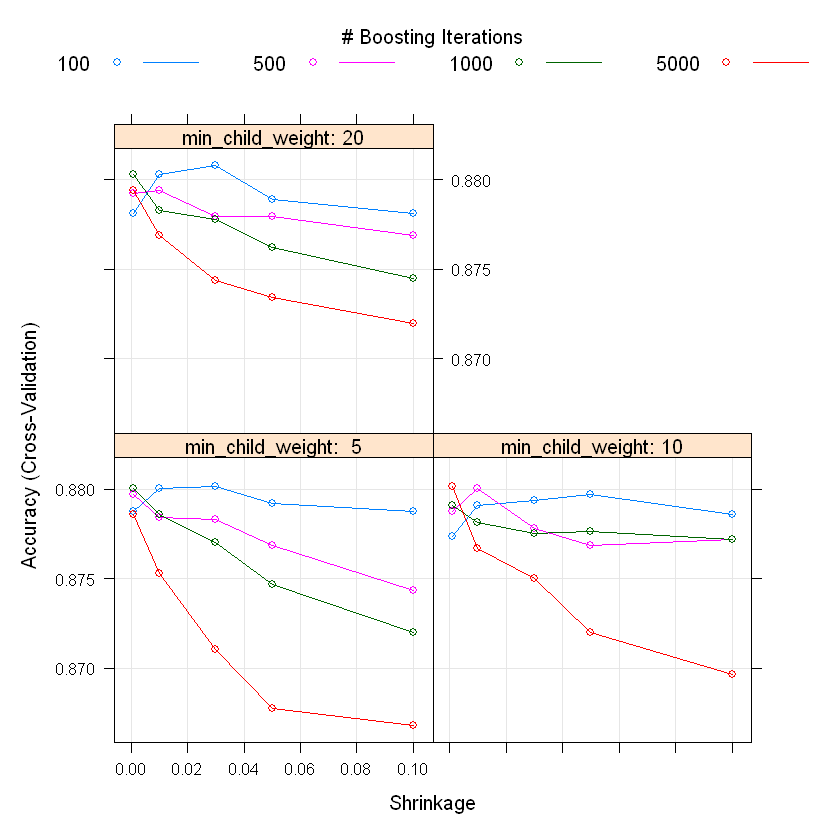

In [11]:
plot(xgbm_1)



Como se ve en los gráficos, nrounds, las iteraciones, proporcionan un máximo de accuracy en 100 y con un Shrinkage de 0,03,(línea azúl) cuando estamos con 20 observaciones mínmas en el nodo final, con lo que parametrizaremos con estos datos obtenidos.
 - max_depth constante en 6
 - colsample_bytree constante en 1
 - subsample was held constante en 1
 - nrounds = 100,
 - max_depth = 6,
 - eta = 0.03,
 - colsample_bytree = 1,
 - min_child_weight = 20,
 - subsample= 1,

### Estudio de early stopping

Probamos a fijar algunos parámetros para ver como evoluciona con diferentes iteraciones ya parametrizado, y observamos cuántas seria bueno utilizar.

In [ ]:
set.seed(12345)

xgbmgrid<-expand.grid(eta=c(0.03),
 min_child_weight=c(20),
 nrounds=c(50,100,150,200,250,300),
  max_depth=6,gamma=0,colsample_bytree=1,subsample=1)

control<-trainControl(method = "cv",number=10,savePredictions = "all", classProbs=TRUE) 

xgbm_11<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
            data=data,
            method="xgbTree",
            trControl=control,
            tuneGrid=xgbmgrid,
            verbose=FALSE)


In [13]:
xgbm_11


eXtreme Gradient Boosting 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5730, 5730, 5730, 5731, 5730, 5730, ... 
Resampling results across tuning parameters:

  nrounds  Accuracy   Kappa    
   50      0.8795373  0.7502909
  100      0.8793805  0.7500956
  150      0.8798520  0.7512332
  200      0.8798520  0.7512836
  250      0.8798518  0.7513669
  300      0.8798518  0.7513825

Tuning parameter 'max_depth' was held constant at a value of 6
Tuning
 parameter 'min_child_weight' was held constant at a value of 20

Tuning parameter 'subsample' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were nrounds = 150, max_depth = 6, eta
 = 0.03, gamma = 0, colsample_bytree = 1, min_child_weight = 20 and subsample
 = 1.

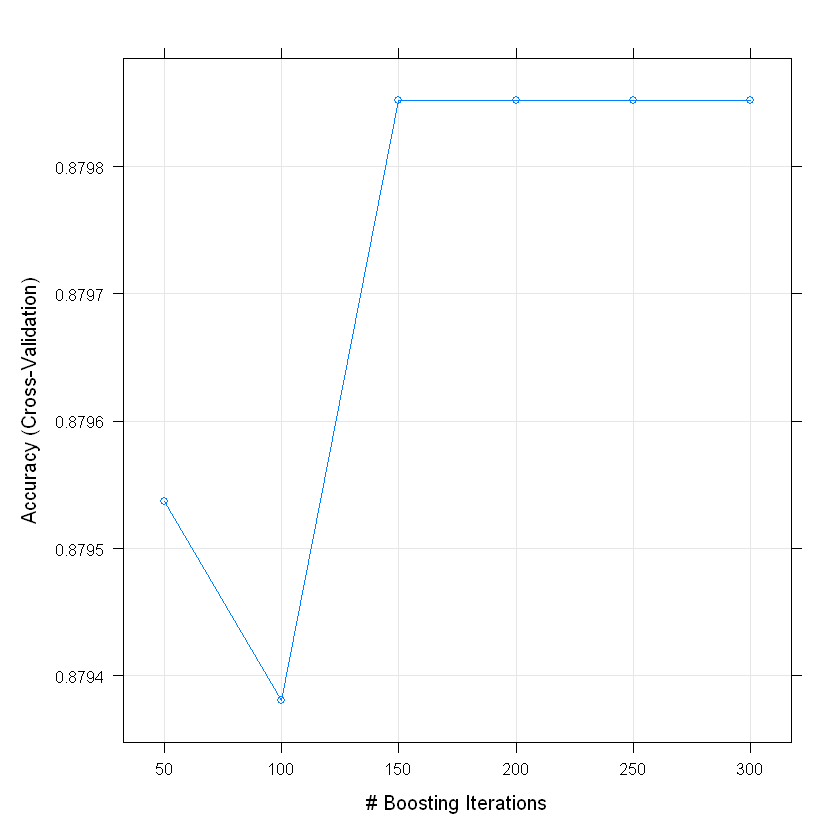

In [14]:
plot(xgbm_11)

Por lo que vemos, con el nrounds = 150 en se optimiza el Accuracy y se mantinene a valores mayores, luego dejaremos ese valor.


### Mejor modelo con el set de variables variables básico.


In [ ]:
medias1<-cruzadaxgbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       min_child_weight=20,
                       eta=0.03,
                       nrounds=150,
                       max_depth=6,
                       gamma=0,
                       colsample_bytree=1,
                       subsample=1,
                       alpha=0,
                       lambda=0,
                       lambda_bias=0)



medias1$modelo="xgbm1"

In [ ]:
#resultado medias1
  min_child_weight  eta nrounds max_depth gamma colsample_bytree subsample
1               20 0.03     150         6     0                1         1
   Accuracy   Kappa  AccuracySD    KappaSD
1 0.8797541 0.75109 0.007738764 0.01633674
​

## Importancia variables

xgbTree variable importance

           Overall
hosp_y    100.0000
highbp_nk   3.7961
age         2.7037
angina_nk   2.4591
stroke_nk   2.0608
smstat_nk   0.6384
yronset     0.2110
angina_y    0.2048
stroke_y    0.0000

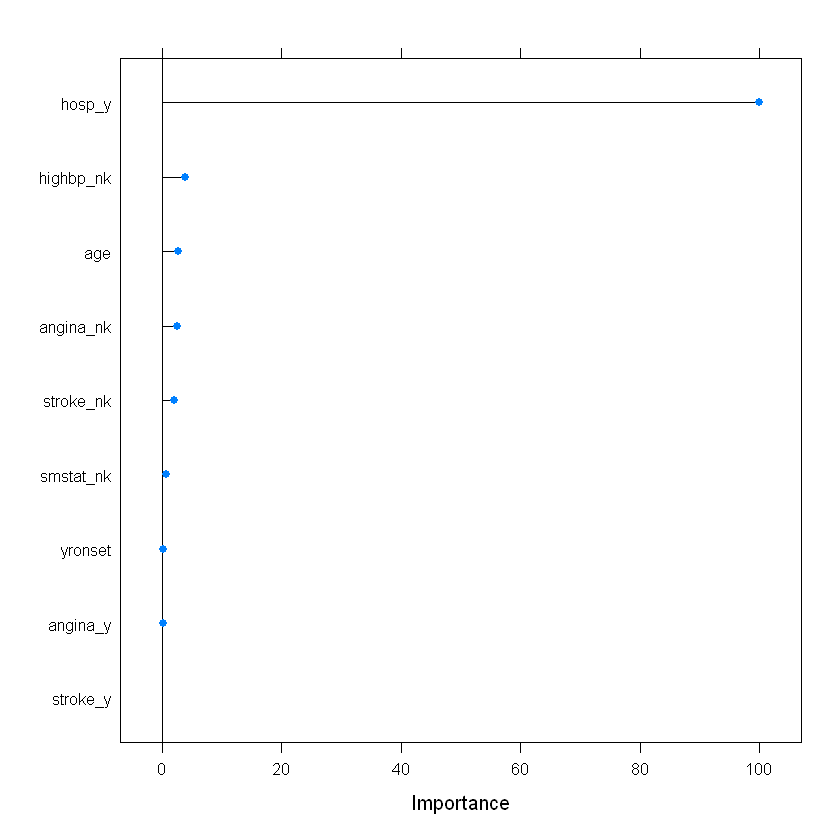

In [16]:
# IMPORTANCIA DE VARIABLES

varImp(xgbm_11)
plot(varImp(xgbm_11))


## Segundo set de variables

Tiene sentido este gráfico de importancia de variables, al destacar la variable hosp_y también en el gráfico de importancia de variables de Random Forest y Gbm.  Aparece no obstante hosp_y con valor de 100% en importancia y stroke_y con valor 0 % en importancia.En este caso vamos a eliminar de momento smstat_nk, stroke_y, angina_y, yronset. Nos vamos a quedar con un set de cinco variables:
- hosp_y+highbp_nk+age+angina_nk+stroke_nk

### Tuneado on el nuevo set de variables con Caret

In [21]:
set.seed(40)

xgbmgrid<-expand.grid(
 min_child_weight=c(5,10,20),
 eta=c(0.1,0.05,0.03,0.01,0.001),
 nrounds=c(100,500,1000,5000),
 max_depth=6,gamma=0,colsample_bytree=1,subsample=1)

control<-trainControl(method = "cv",number=4,savePredictions = "all",classProbs=TRUE) 

xgbm_2<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+stroke_nk,
            data=data,
            method="xgbTree",
            trControl=control,
            tuneGrid=xgbmgrid,
            verbose=FALSE)


In [22]:
xgbm_2

eXtreme Gradient Boosting 

6367 samples
   5 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (4 fold) 
Summary of sample sizes: 4776, 4774, 4775, 4776 
Resampling results across tuning parameters:

  eta    min_child_weight  nrounds  Accuracy   Kappa    
  0.001   5                 100     0.8796915  0.7508971
  0.001   5                 500     0.8798483  0.7512055
  0.001   5                1000     0.8801625  0.7517836
  0.001   5                5000     0.8800057  0.7514702
  0.001  10                 100     0.8773354  0.7458889
  0.001  10                 500     0.8787491  0.7486517
  0.001  10                1000     0.8787490  0.7485846
  0.001  10                5000     0.8795342  0.7504879
  0.001  20                 100     0.8781210  0.7475862
  0.001  20                 500     0.8796912  0.7506969
  0.001  20                1000     0.8798482  0.7510142
  0.001  20                5000     0.8792197  0.7499030
  0.010   5             

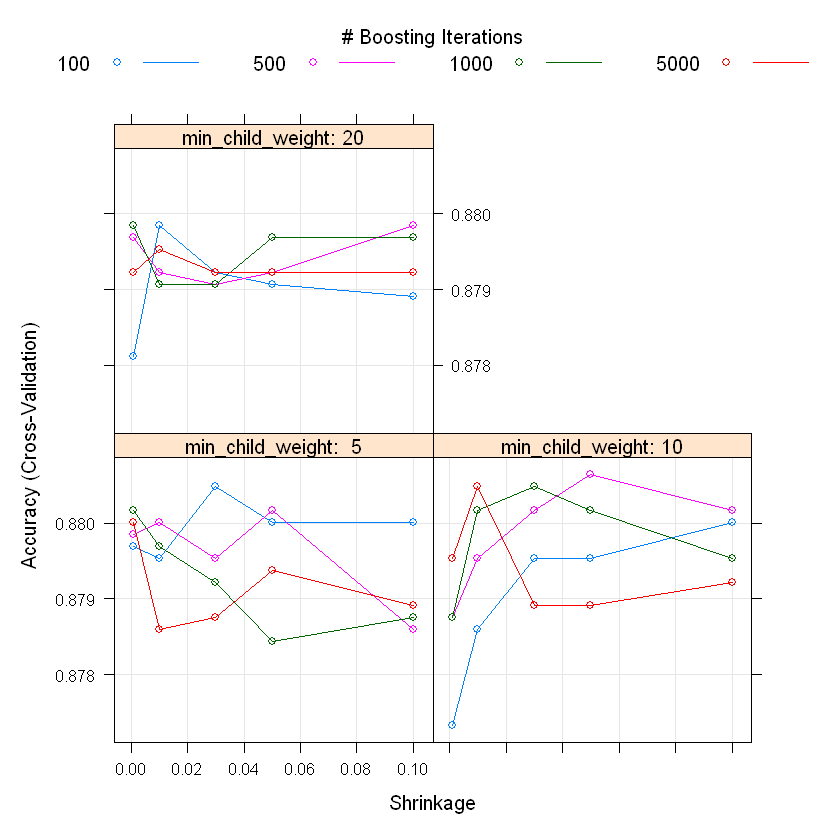

In [23]:
plot(xgbm_2)

Cómo se puede apreciar en los gráficos, los valores han cambiado, y ahora sí se diferencia más la evolución de la Accuracy y queda asintóticamente definida. Tenemos que el máximo se nos da en la línea de 500 iteraciones, para un shrinkage de 0,05 y con un mínimo de 10 en min_child_weight. El esto de parámetros siguen permaneciendo constantes.

- max_depth = 6,
- colsample_bytree = 1,
- subsample constant = 1,
- nrounds = 500, 
- max_depth = 6,
- eta = 0.05, 
- gamma = 0, 
- colsample_bytree = 1,
- min_child_weight = 10,
- subsample = 1.

### Estudio de early stopping

In [25]:
set.seed(12345)

xgbmgrid<-expand.grid(eta=c(0.05),
 min_child_weight=c(10),
 nrounds=c(50,100,150,200,250,300),
  max_depth=6,gamma=0,colsample_bytree=1,subsample=1)

control<-trainControl(method = "cv",number=10,savePredictions = "all", classProbs=TRUE) 

xgbm_21<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+stroke_nk,
            data=data,
            method="xgbTree",
            trControl=control,
            tuneGrid=xgbmgrid,
            verbose=FALSE)



In [26]:
xgbm_21

eXtreme Gradient Boosting 

6367 samples
   5 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5730, 5730, 5730, 5731, 5730, 5730, ... 
Resampling results across tuning parameters:

  nrounds  Accuracy   Kappa    
   50      0.8800082  0.7513916
  100      0.8800078  0.7514625
  150      0.8798505  0.7511457
  200      0.8798505  0.7511290
  250      0.8798505  0.7511614
  300      0.8798505  0.7511614

Tuning parameter 'max_depth' was held constant at a value of 6
Tuning
 parameter 'min_child_weight' was held constant at a value of 10

Tuning parameter 'subsample' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were nrounds = 50, max_depth = 6, eta
 = 0.05, gamma = 0, colsample_bytree = 1, min_child_weight = 10 and subsample
 = 1.

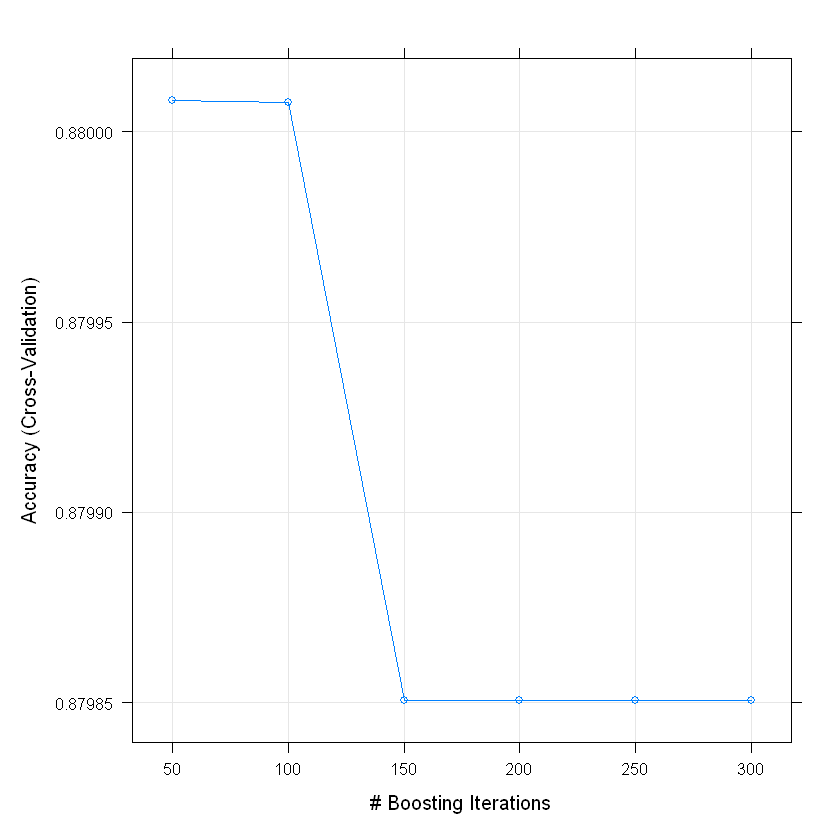

In [27]:
plot(xgbm_21)

Parece lógico mantener un nround en 50, pues ya aunque hasta 100 casi se mantiene, luego siemrpe es menor.

### Mejor modelo con el nuevo set de variables.

In [ ]:
medias2<-cruzadaxgbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       min_child_weight=10,
                       eta=0.05,
                       nrounds=50,
                       max_depth=6,
                       gamma=0,
                       colsample_bytree=1,
                       subsample=1,
                       alpha=0,
                       lambda=0,
                       lambda_bias=0)



medias2$modelo="xgbm2"

In [ ]:
#Resultado medias2

min_child_weight  eta nrounds max_depth gamma colsample_bytree subsample
1               10 0.05      50         6     0                1         1
   Accuracy     Kappa  AccuracySD    KappaSD
1 0.8792205 0.7497185 0.007301174 0.01549721

## Elección mejor modelo entre diferentes set de variables

In [31]:
union1<-rbind(medias1,medias2)

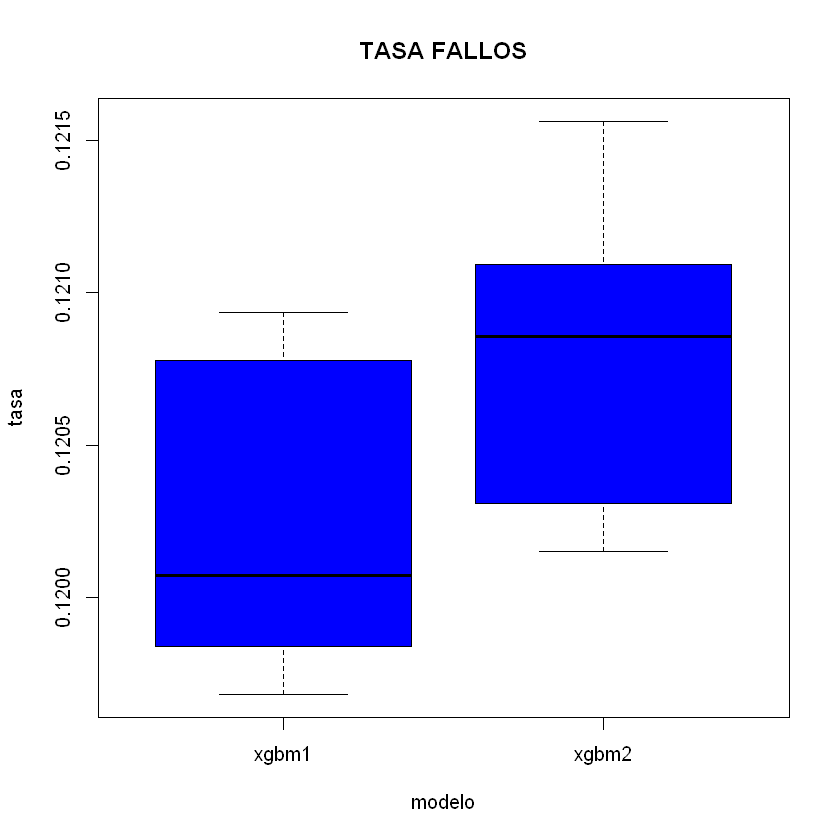

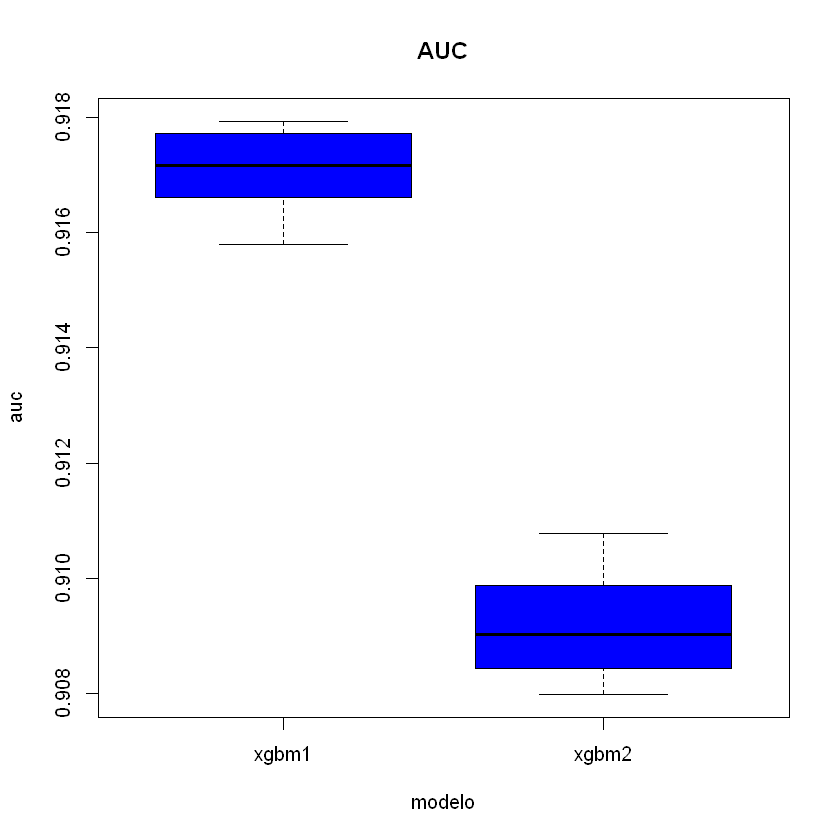

In [32]:
par(cex.axis=1.0)
#boxplot(data=union1, tasa~modelo, modelo,main="TASA FALLOS", col="pink")
#par(cex.axis=1.0)
boxplot(data=union1,tasa~modelo,main="TASA FALLOS",col="blue")
boxplot(data=union1,auc~modelo,main="AUC",col="blue")


Entre estos dos modelos, el correspondiente al set clásico de variables es que el que mejor tasa de fallos presenta y el que mayor área bajo la curva, con lo que el modeloselo Xgbm1 es el escogido como mejoror modelo. 
Ahora vamos a realizar el tuneado para reducir la varianza [sorteo observaciones, alpha y variables] sobre este a ver si se consigue mejorar un poco..

## Tunning para reducir la varianza [sorteo observaciones, alpha y variables]

In [ ]:
# Tanteando colsample_bytree=0.7,

medias11<-cruzadaxgbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       min_child_weight=20,
                       eta=0.03,
                       nrounds=150,
                       max_depth=6,
                       gamma=0,
                       colsample_bytree=0.7,
                       subsample=1,
                       alpha=0,
                       lambda=0,
                       lambda_bias=0)



medias11$modelo="xgbm11"

In [ ]:
#Resultados medias 11

min_child_weight  eta nrounds max_depth gamma colsample_bytree subsample
1               20 0.03     150         6     0              0.7         1
   Accuracy     Kappa  AccuracySD    KappaSD
1 0.8795186 0.7505705 0.007498223 0.01584875

In [ ]:
# colsample_bytree=0.8
medias12<-cruzadaxgbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       min_child_weight=20,
                       eta=0.03,
                       nrounds=150,
                       max_depth=6,
                       gamma=0,
                       colsample_bytree=0.8,
                       subsample=1,
                       alpha=0,
                       lambda=0,
                       lambda_bias=0)



medias12$modelo="xgbm12"

In [ ]:
#resultados medias 12
  min_child_weight  eta nrounds max_depth gamma colsample_bytree subsample
1               20 0.03     150         6     0              0.8         1
   Accuracy     Kappa  AccuracySD    KappaSD
1 0.8795028 0.7505451 0.007627614 0.01611858

In [ ]:
# colsample_bytree=0.9

medias13<-cruzadaxgbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       min_child_weight=20,
                       eta=0.03,
                       nrounds=150,
                       max_depth=6,
                       gamma=0,
                       colsample_bytree=0.9,
                       subsample=1,
                       alpha=0,
                       lambda=0,
                       lambda_bias=0)



medias13$modelo="xgbm13"

In [ ]:
#resultados medias13

min_child_weight  eta nrounds max_depth gamma colsample_bytree subsample
1               20 0.03     150         6     0              0.9         1
   Accuracy     Kappa  AccuracySD    KappaSD
1 0.8796441 0.7508469 0.007774343 0.01642156

In [ ]:
#subsample 0.8
medias14<-cruzadaxgbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       min_child_weight=20,
                       eta=0.03,
                       nrounds=150,
                       max_depth=6,
                       gamma=0,
                       colsample_bytree=1,
                       subsample=0.8,
                       alpha=0,
                       lambda=0,
                       lambda_bias=0)



medias14$modelo="xgbm14"

In [ ]:
#resultados medias 14
  min_child_weight  eta nrounds max_depth gamma colsample_bytree subsample
1               20 0.03     150         6     0                1       0.8
   Accuracy     Kappa  AccuracySD    KappaSD
1 0.8795814 0.7507953 0.007298194 0.01542141

In [ ]:
# subsample 0.9
medias15<-cruzadaxgbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       min_child_weight=20,
                       eta=0.03,
                       nrounds=150,
                       max_depth=6,
                       gamma=0,
                       colsample_bytree=1,
                       subsample=0.9,
                       alpha=0,
                       lambda=0,
                       lambda_bias=0)



medias15$modelo="xgbm15"

In [ ]:
# resultados medias 15
  min_child_weight  eta nrounds max_depth gamma colsample_bytree subsample
1               20 0.03     150         6     0                1       0.9
   Accuracy     Kappa  AccuracySD    KappaSD
1 0.8796913 0.7509957 0.007497128 0.01582856

In [ ]:
Alpha 0.5

medias16<-cruzadaxgbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       min_child_weight=20,
                       eta=0.03,
                       nrounds=150,
                       max_depth=6,
                       gamma=0,
                       colsample_bytree=1,
                       subsample=1,
                       alpha=0.5,
                       lambda=0,
                       lambda_bias=0)



medias16$modelo="xgbm16"

In [ ]:
# resultados medias 16
  min_child_weight  eta nrounds max_depth gamma colsample_bytree subsample
1               20 0.03     150         6     0                1         1
   Accuracy     Kappa  AccuracySD    KappaSD
1 0.8798169 0.7512206 0.007607035 0.01606215
Alpha 0.5
Alpha 0.5

In [39]:
union11<-rbind(medias1,medias11,medias12,medias13,medias14,medias15,medias16)

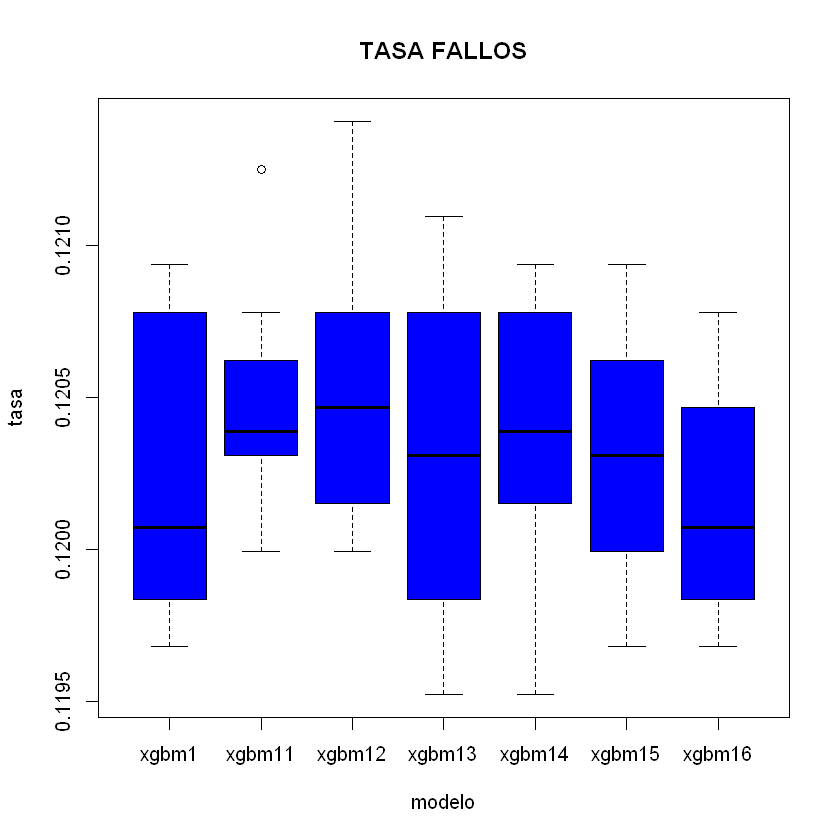

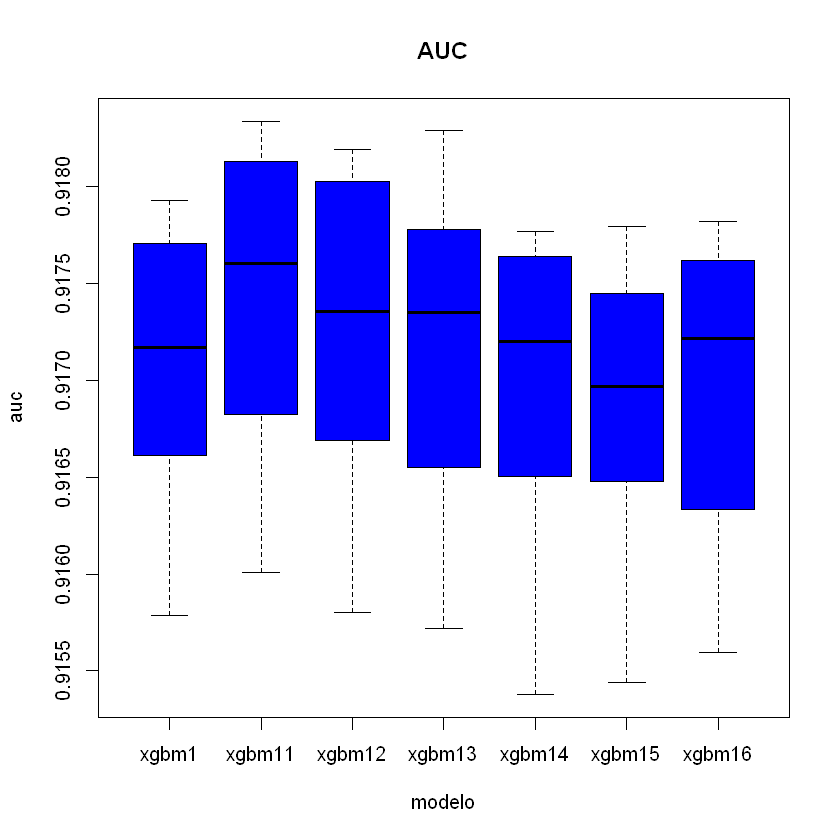

In [40]:
par(cex.axis=1.0)

boxplot(data=union11,tasa~modelo,main="TASA FALLOS",col="blue")
boxplot(data=union11,auc~modelo,main="AUC",col="blue")

### Elección mejor modelo GBM

El mejor modelo GBM es por tanto el Xgbm11,por presentar una tasa de fallos parecida , pero menos variabilidad y sobretodo por presentar un área bajo la curva mayor.
Los parámetros del modelo son:

- Variables: "hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", "smstat_nk", "yronset", "stroke_y", "stroke_nk"),
- min_child_weight=20,
- eta=0.03,
- nrounds=150,
- max_depth=6,
- gamma=0,
- colsample_bytree=0.7,
- subsample=1,
- alpha=0,
- lambda=0,
- lambda_bias=0)




## Comparación con otros modelos del resto de algoritmos

In [3]:
#Mejor modelo de regresión logística (medias3 de EDA_NNET)
medias_1<-cruzadalogistica(data=data,
                    vardep=c("outcome"),
                    listconti=
c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


 medias_1$modelo="Logística"


In [ ]:
#mejor modelo de red neuronal(medias9 de EDA_NNET)
medias_2<-cruzadaavnnetbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=25,
                       repeticiones=5,
                       itera=500,
                       size=c(5),
                       decay=c(0.001))

  medias_2$modelo="avnnet"

In [ ]:
#Resultados medias_2

stopped after 500 iterations
  size decay   bag  Accuracy     Kappa AccuracySD    KappaSD
1    5 0.001 FALSE 0.8767774 0.7450545 0.01110455 0.02346587

In [5]:
#mejor modelo de árbol
medias_3<-cruzadaarbolbin(data=data,
                     vardep="outcome",
                     listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                     listclass=c(""),
                     grupos=10,
                     sinicio=1234,
                     repe=5,
                     cp=c(0),
                     minbucket =40)

medias_3$modelo="arbol"

  cp  Accuracy     Kappa AccuracySD    KappaSD
1  0 0.8720909 0.7362186 0.01168732 0.02436023


In [6]:
#mejor modelo de bagging
  medias_4<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=100)

  medias_4$modelo="bagging"


  mtry  Accuracy    Kappa  AccuracySD   KappaSD
1    9 0.8790632 0.749648 0.007291974 0.0154251


In [7]:
#mejor modelo Random Forest
medias_5<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=150)

  medias_5$modelo="rf"


  mtry  Accuracy     Kappa  AccuracySD   KappaSD
1    3 0.8794873 0.7504862 0.007499957 0.0158603


In [8]:
#mejor modelo GBM
medias_6<-cruzadagbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       n.minobsinnode=5,
                       shrinkage=0.03,
                       n.trees=500,
                       interaction.depth=2)

medias_6$modelo="gbm"

  n.minobsinnode shrinkage n.trees interaction.depth  Accuracy     Kappa
1              5      0.03     500                 2 0.8790319 0.7496926
   AccuracySD    KappaSD
1 0.007446465 0.01571441


In [ ]:
#mejor modelo Xgboost (medias 11)
medias_7<-cruzadaxgbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       min_child_weight=20,
                       eta=0.03,
                       nrounds=150,
                       max_depth=6,
                       gamma=0,
                       colsample_bytree=0.7,
                       subsample=1,
                       alpha=0,
                       lambda=0,
                       lambda_bias=0)



medias_7$modelo="xgbm11"

In [ ]:
#Resultados de medias _7
  min_child_weight  eta nrounds max_depth gamma colsample_bytree subsample
1               20 0.03     150         6     0              0.7         1
   Accuracy     Kappa  AccuracySD    KappaSD
1 0.8795186 0.7505705 0.007498223 0.01584875

In [10]:
union3<-rbind(medias_1,medias_2,medias_3,medias_4,medias_5,medias_6,medias_7)

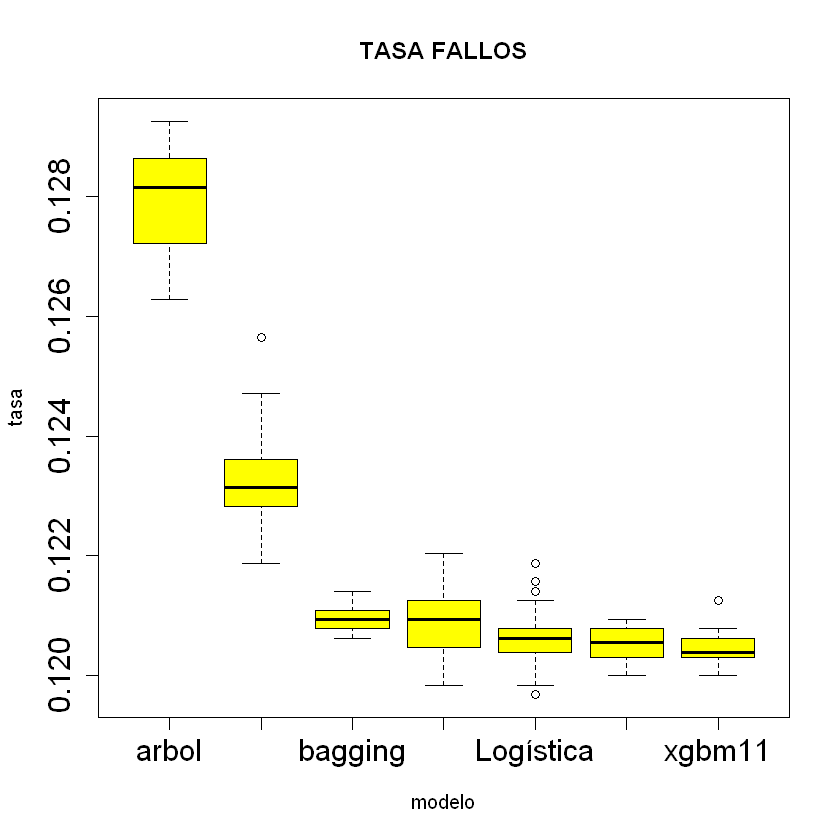

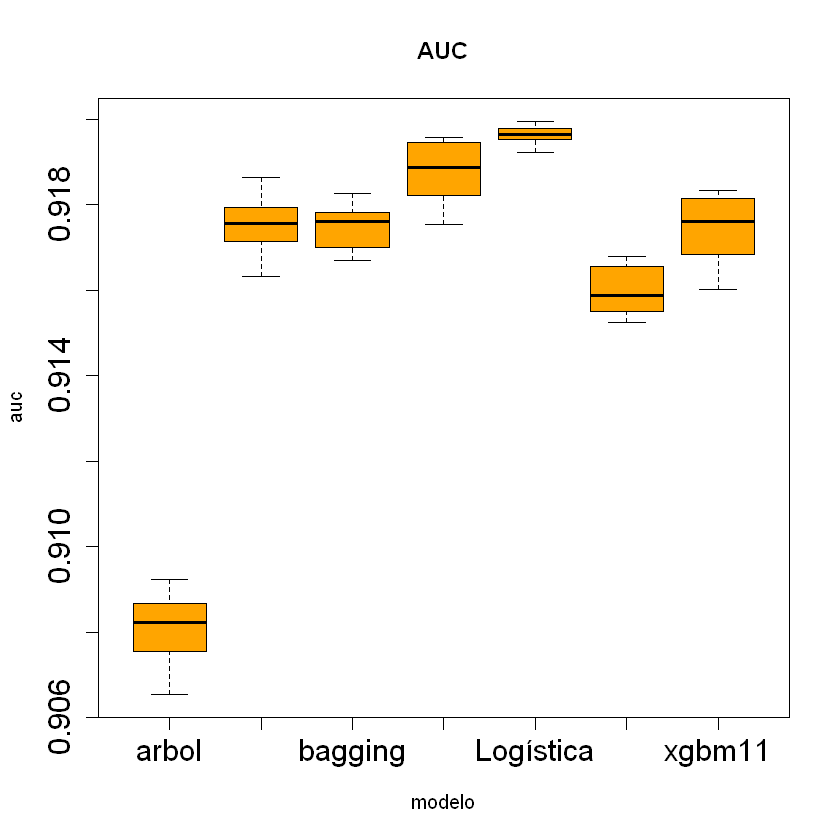

In [11]:
par(cex.axis=1.5)
boxplot(data=union3,tasa~modelo,main="TASA FALLOS",col="yellow")
boxplot(data=union3,auc~modelo,main="AUC",col="orange")

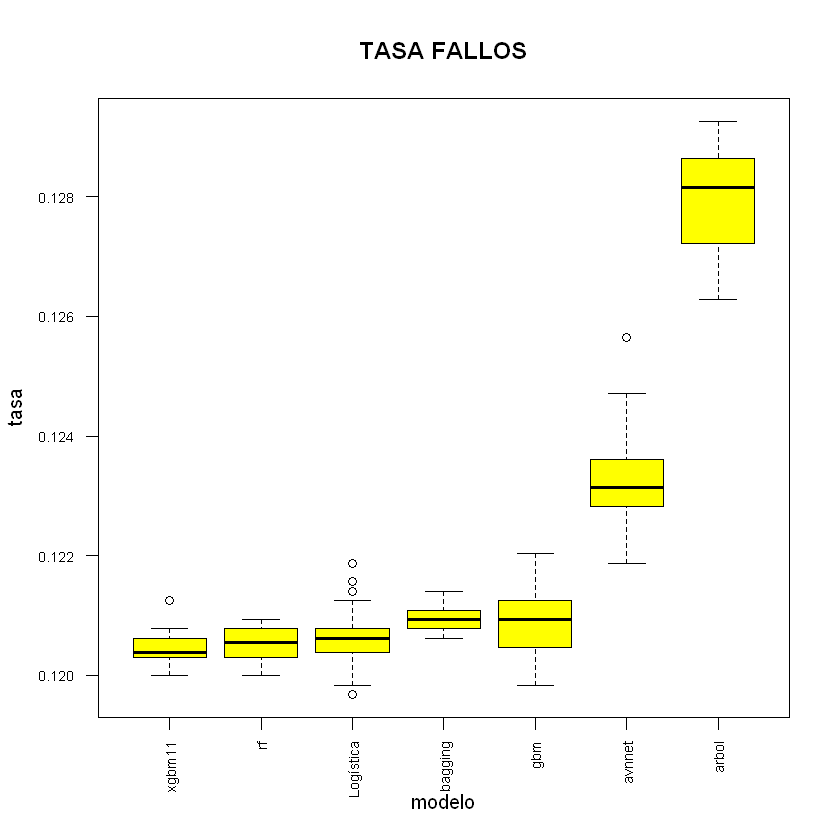

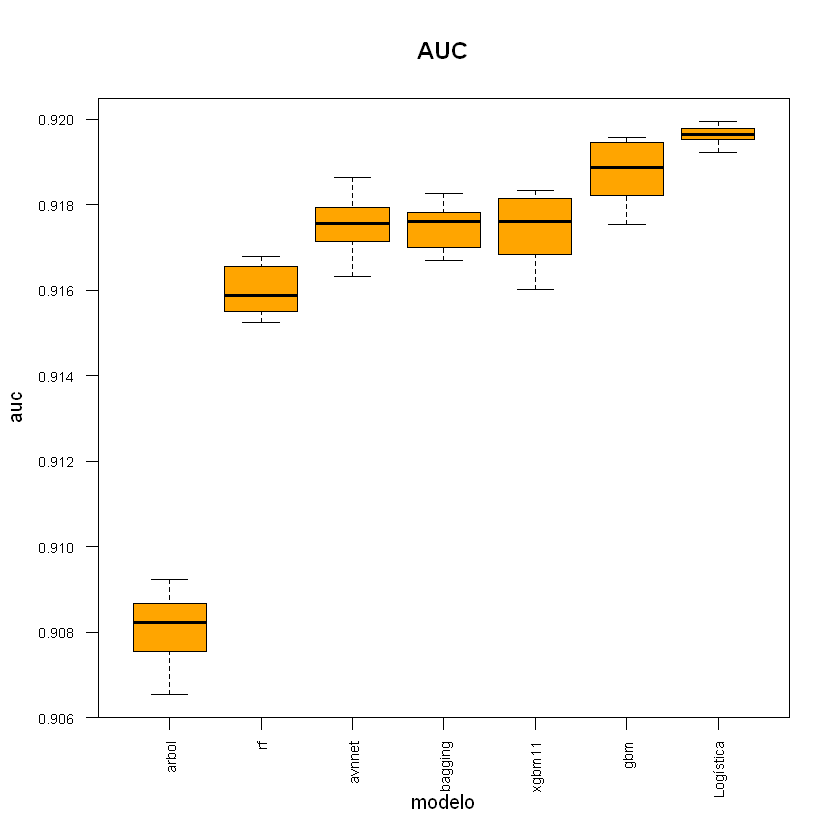

In [12]:
uni<-union3
uni$modelo <- with(uni,
 reorder(modelo,tasa, median))
par(cex.axis=0.7,las=2)
boxplot(data=uni,tasa~modelo,col="yellow",main="TASA FALLOS")

uni<-union3
uni$modelo <- with(uni,
 reorder(modelo,auc, median))
par(cex.axis=0.7,las=2)
boxplot(data=uni,auc~modelo,col="orange",main="AUC")


### Modelo ganador

Como se ha venido apreciando en el resto de modelos, en cuanto al AUC, el modelo más competitivo es la regresión logística, aunque en este caso , respecto a la tasa de fallos, es mejor el Xgboost, pero aun así el modelo ganador es la regresión logística.